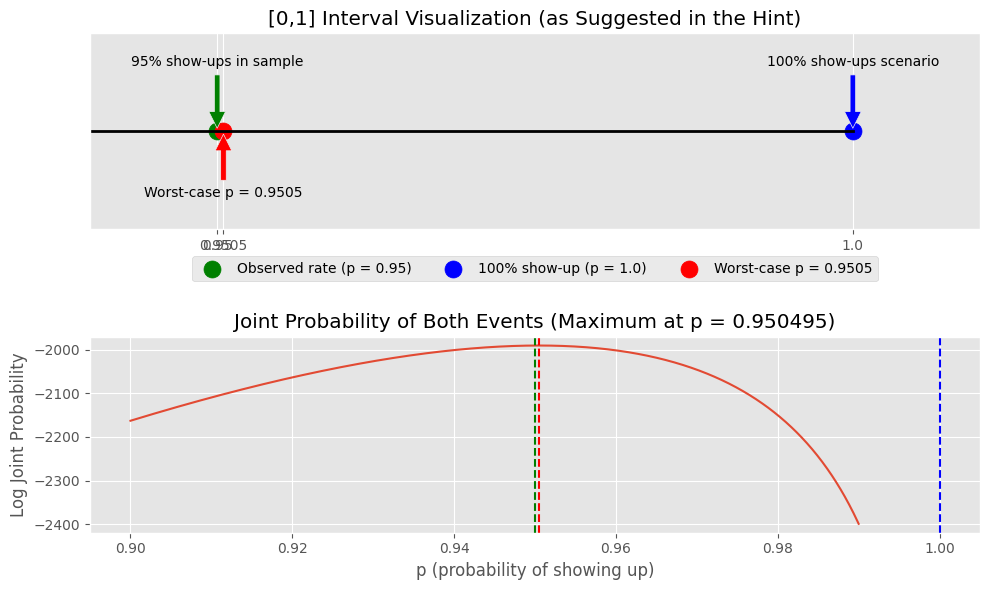

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# Set the font size for better readability
plt.rcParams.update({"font.size": 12})
rng = np.random.default_rng(3317)
plt.style.use("ggplot")


# Define the function to maximize (proportional to the joint probability)
def log_joint_prob(p):
    return 9600 * np.log(p) + 500 * np.log(1 - p)


# Create a range of p values
p_values = np.linspace(0.90, 0.99, 1000)

# Calculate the log joint probability for each p
log_probs = [log_joint_prob(p) for p in p_values]

# Calculate exact value
exact_p = 96 / 101
exact_overbook_prob = exact_p**100

# Create a simple visualization as suggested in the hint
plt.figure(figsize=(10, 6))

# Create the visualization of the [0,1] interval
plt.subplot(2, 1, 1)
plt.plot([0, 1], [0, 0], "k-", linewidth=2)  # The [0,1] interval
plt.scatter([0.95], [0], color="g", s=150, marker="o", label="Observed rate (p = 0.95)")
plt.scatter([1.0], [0], color="b", s=150, marker="o", label="100% show-up (p = 1.0)")
plt.scatter(
    [exact_p], [0], color="r", s=150, marker="o", label=f"Worst-case p = {exact_p:.4f}"
)

# Add text annotations
plt.annotate(
    "95% show-ups in sample",
    xy=(0.95, 0),
    xytext=(0.95, 0.02),
    arrowprops=dict(facecolor="green", shrink=0.05),
    ha="center",
)
plt.annotate(
    "100% show-ups scenario",
    xy=(1.0, 0),
    xytext=(1.0, 0.02),
    arrowprops=dict(facecolor="blue", shrink=0.05),
    ha="center",
)
plt.annotate(
    f"Worst-case p = {exact_p:.4f}",
    xy=(exact_p, 0),
    xytext=(exact_p, -0.02),
    arrowprops=dict(facecolor="red", shrink=0.05),
    ha="center",
)

plt.xlim(0.94, 1.01)
plt.ylim(-0.03, 0.03)
plt.title("[0,1] Interval Visualization (as Suggested in the Hint)")
plt.xticks([0.95, exact_p, 1.0], ["0.95", f"{exact_p:.4f}", "1.0"])
plt.yticks([])
plt.legend(loc="lower center", bbox_to_anchor=(0.5, -0.3), ncol=3)

# Show joint probability function
plt.subplot(2, 1, 2)
plt.plot(p_values, log_probs)
plt.axvline(x=0.95, color="g", linestyle="--", label="Observed rate (p = 0.95)")
plt.axvline(x=exact_p, color="r", linestyle="--", label=f"Worst-case p = {exact_p:.4f}")
plt.axvline(x=1.0, color="b", linestyle="--", label="100% show-up (p = 1.0)")

plt.xlabel("p (probability of showing up)")
plt.ylabel("Log Joint Probability")
plt.title(f"Joint Probability of Both Events (Maximum at p = {exact_p:.6f})")
plt.grid(True)

plt.tight_layout(h_pad=2)
plt.savefig("overbooking_visualization.pdf", dpi=600, bbox_inches="tight")
plt.show()